## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import statsmodels.api as sm  

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.neural_network import MLPRegressor


In [4]:
plt.rcParams['figure.figsize'] = (15,8)

In [5]:
df1 = pd.read_csv('2015.csv')
df2 = pd.read_csv('2016.csv')
df3 = pd.read_csv('2017.csv')
df4 = pd.read_csv('2018.csv')
df5 = pd.read_csv('2019.csv')
df6 = pd.read_csv('2020.csv')
df7 = pd.read_csv('2021.csv')

In [6]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7])
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,lowerwhisker,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(1084, 45)

In [8]:
print('Percentage of null values for each column:')
for col in df.columns:
  print(str(col)+':',str(np.round((df[col].isnull().sum()/len(df[col])*100),2)) + '%')

Percentage of null values for each column:
Country: 56.64%
Region: 70.94%
Happiness Rank: 70.94%
Happiness Score: 70.94%
Standard Error: 85.42%
Economy (GDP per Capita): 70.94%
Family: 56.64%
Health (Life Expectancy): 70.94%
Freedom: 56.64%
Trust (Government Corruption): 70.94%
Generosity: 0.0%
Dystopia Residual: 70.94%
Lower Confidence Interval: 85.52%
Upper Confidence Interval: 85.52%
Happiness.Rank: 85.7%
Happiness.Score: 85.7%
Whisker.high: 85.7%
Whisker.low: 85.7%
Economy..GDP.per.Capita.: 85.7%
Health..Life.Expectancy.: 85.7%
Trust..Government.Corruption.: 85.7%
Dystopia.Residual: 85.7%
Overall rank: 71.22%
Country or region: 71.22%
Score: 71.22%
GDP per capita: 71.22%
Social support: 43.36%
Healthy life expectancy: 43.36%
Freedom to make life choices: 43.36%
Perceptions of corruption: 43.45%
Country name: 72.14%
Regional indicator: 72.14%
Ladder score: 72.14%
Standard error of ladder score: 72.14%
upperwhisker: 72.14%
lowerwhisker: 72.14%
Logged GDP per capita: 72.14%
Ladder sco

**Checking for duplicate values**

In [9]:
df[df.duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,lowerwhisker,Logged GDP per capita,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual


In [10]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life

In [11]:
df = df.filter(
    ['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Score                315 non-null    float64
 3   Economy (GDP per Capita)       315 non-null    float64
 4   Family                         470 non-null    float64
 5   Health (Life Expectancy)       315 non-null    float64
 6   Freedom                        470 non-null    float64
 7   Trust (Government Corruption)  315 non-null    float64
 8   Generosity                     1084 non-null   float64
dtypes: float64(7), object(2)
memory usage: 84.7+ KB


In [12]:
df.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.779171,0.693547,0.734491,0.556414,0.397989,0.168272
Economy (GDP per Capita),0.779171,1.000000,0.566283,0.789103,0.331127,0.294856,-0.015402
Family,0.693547,0.566283,1.000000,0.569937,0.425377,0.205060,0.071775
Health (Life Expectancy),0.734491,0.789103,0.569937,1.000000,0.369799,0.249773,0.088002
Freedom,0.556414,0.331127,0.425377,0.369799,1.000000,0.492875,0.343389
Trust (Government Corruption),0.397989,0.294856,0.205060,0.249773,0.492875,1.000000,0.289499
Generosity,0.168272,-0.015402,0.071775,0.088002,0.343389,0.289499,1.000000


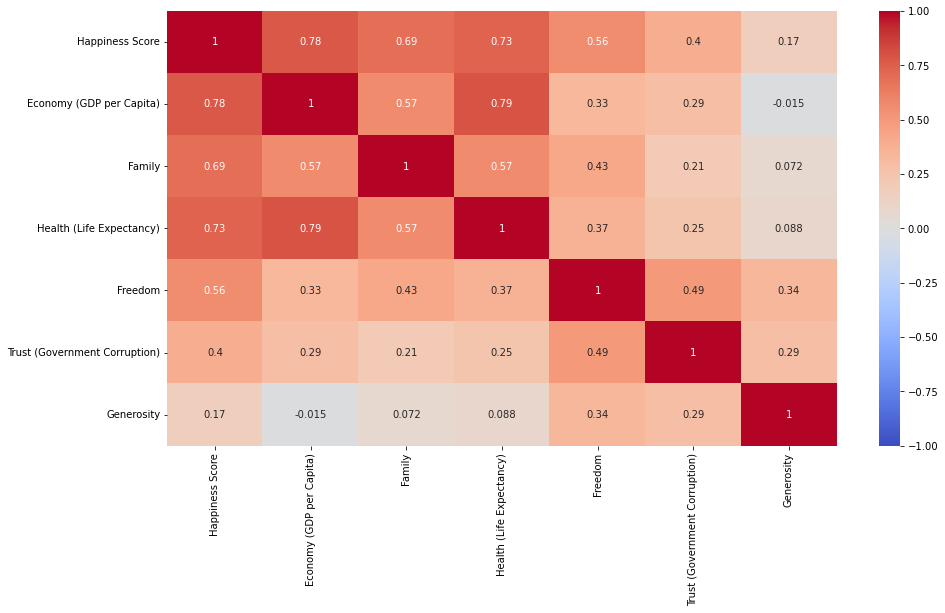

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

*There is a mild positive correlation between Freedom and each of Trust Government Curruption and Family.*

**Let's identify the top 10 countries with best happiness score.**

In [14]:
top_10_countries = df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).reset_index()[:10]
top_10_countries

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
5,Finland,7.413
6,Netherlands,7.378
7,Sweden,7.364
8,New Zealand,7.334
9,Australia,7.313


Text(0, 0.5, 'Happiness Score')

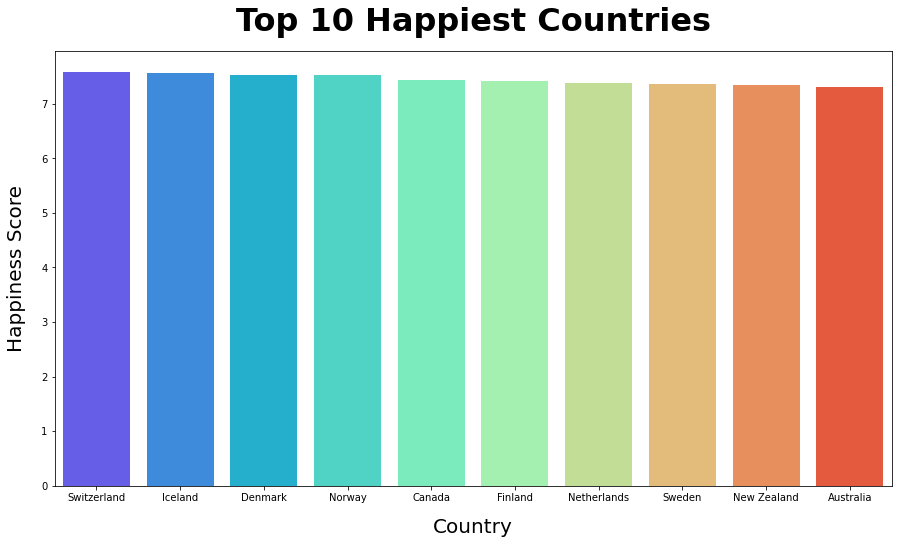

In [15]:
sns.barplot(x='Country', y='Happiness Score', data=top_10_countries, palette='rainbow')
plt.title('Top 10 Happiest Countries', fontsize=32, pad=20, fontweight='bold')
plt.xlabel('Country', fontsize=20, labelpad=15)
plt.ylabel('Happiness Score', fontsize=20, labelpad=15)

***Switzerland is the happiest country in the world closely followed by Iceland.***

**Let's find the top 10 countries with least happiness scores.**

In [16]:
least_happiness_scores = df.groupby('Country')['Happiness Score'].min().sort_values().reset_index()[:10]
least_happiness_scores

,Country,Happiness Score
0,Togo,2.839
1,Burundi,2.905
2,Syria,3.006
3,Benin,3.340
4,Afghanistan,3.360
5,Rwanda,3.465
6,Burkina Faso,3.587
7,Guinea,3.607
8,Liberia,3.622
9,Ivory Coast,3.655


Text(0, 0.5, 'Happiness Score')

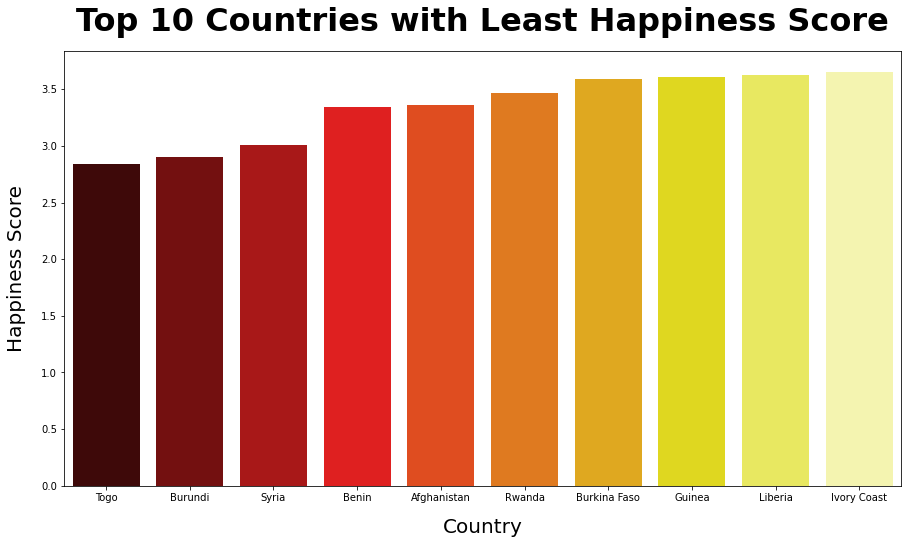

In [17]:
sns.barplot(x='Country', y='Happiness Score', data=least_happiness_scores, palette='hot')
plt.title('Top 10 Countries with Least Happiness Score', fontsize=32, pad=20, fontweight='bold')
plt.xlabel('Country', fontsize=20, labelpad=15)
plt.ylabel('Happiness Score', fontsize=20, labelpad=15)

***Togo is the least happiest country in the world.***

## **Let's do the same for regions as well.**

In [18]:
most_happiest_regions = df.groupby('Region')['Happiness Score'].max().sort_values(ascending=False).reset_index()[:10]
most_happiest_regions

,Region,Happiness Score
0,Western Europe,7.587
1,North America,7.427
2,Australia and New Zealand,7.334
3,Middle East and Northern Africa,7.278
4,Latin America and Caribbean,7.226
5,Southeastern Asia,6.798
6,Central and Eastern Europe,6.596
7,Eastern Asia,6.379
8,Sub-Saharan Africa,5.648
9,Southern Asia,5.253


Text(0, 0.5, 'Happiness Score')

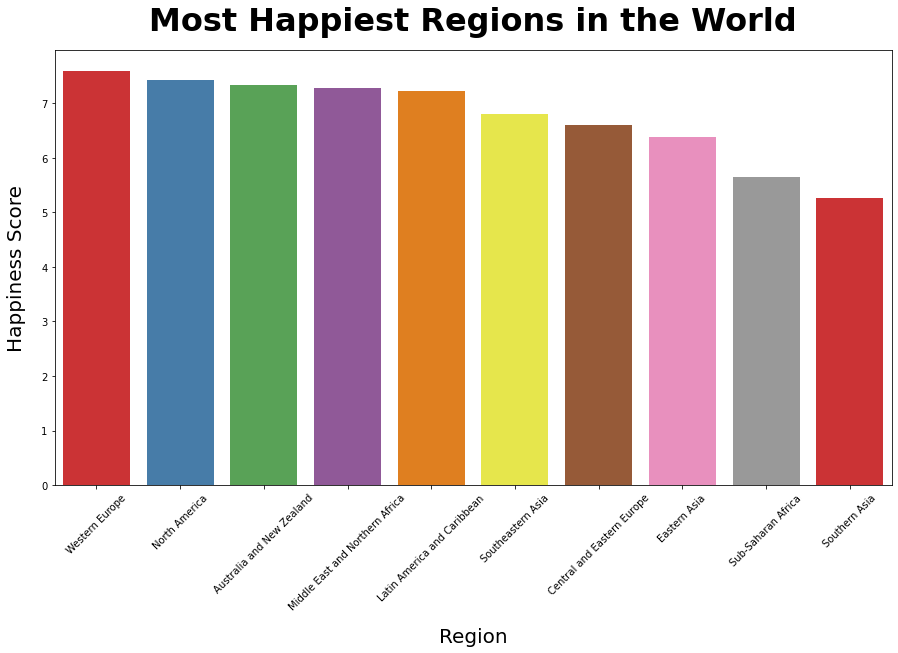

In [19]:
sns.barplot(x='Region', y='Happiness Score', data=most_happiest_regions, palette='Set1')
plt.title('Most Happiest Regions in the World', fontsize=32, pad=20, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Region', fontsize=20, labelpad=15)
plt.ylabel('Happiness Score', fontsize=20, labelpad=15)

Western Europe is the most happiest continent in the world.

In [20]:
least_happiness_regions = df.groupby('Region')['Happiness Score'].min().sort_values().reset_index()[:10]
least_happiness_regions

,Region,Happiness Score
0,Sub-Saharan Africa,2.839
1,Middle East and Northern Africa,3.006
2,Southern Asia,3.360
3,Southeastern Asia,3.819
4,Latin America and Caribbean,4.028
5,Central and Eastern Europe,4.217
6,Western Europe,4.857
7,Eastern Asia,4.874
8,North America,7.104
9,Australia and New Zealand,7.284


Text(0, 0.5, 'Happiness Score')

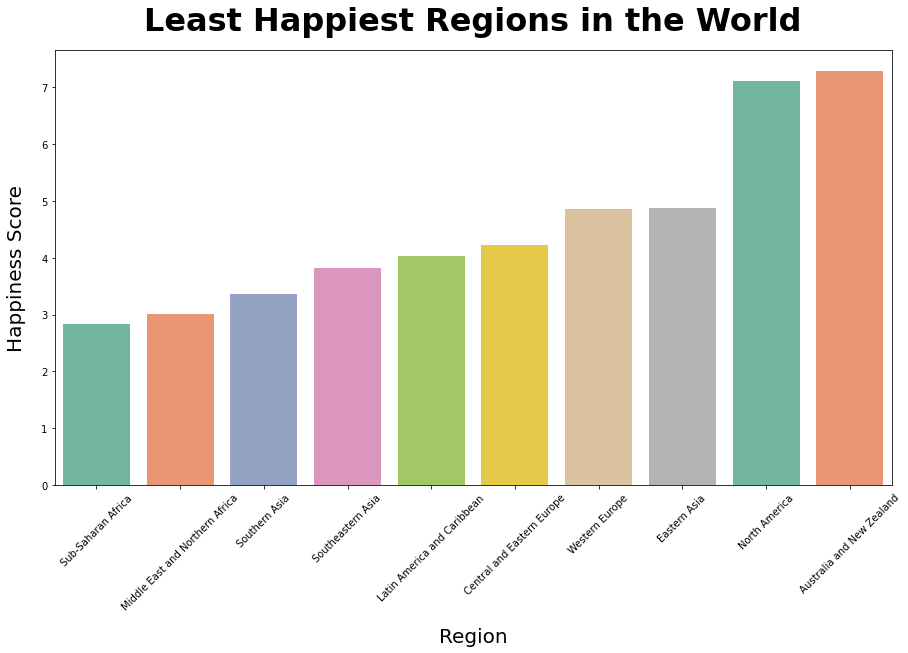

In [21]:
sns.barplot(x='Region', y='Happiness Score', data=least_happiness_regions, palette='Set2')
plt.title('Least Happiest Regions in the World', fontsize=32, pad=20, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Region', fontsize=20, labelpad=15)
plt.ylabel('Happiness Score', fontsize=20, labelpad=15)

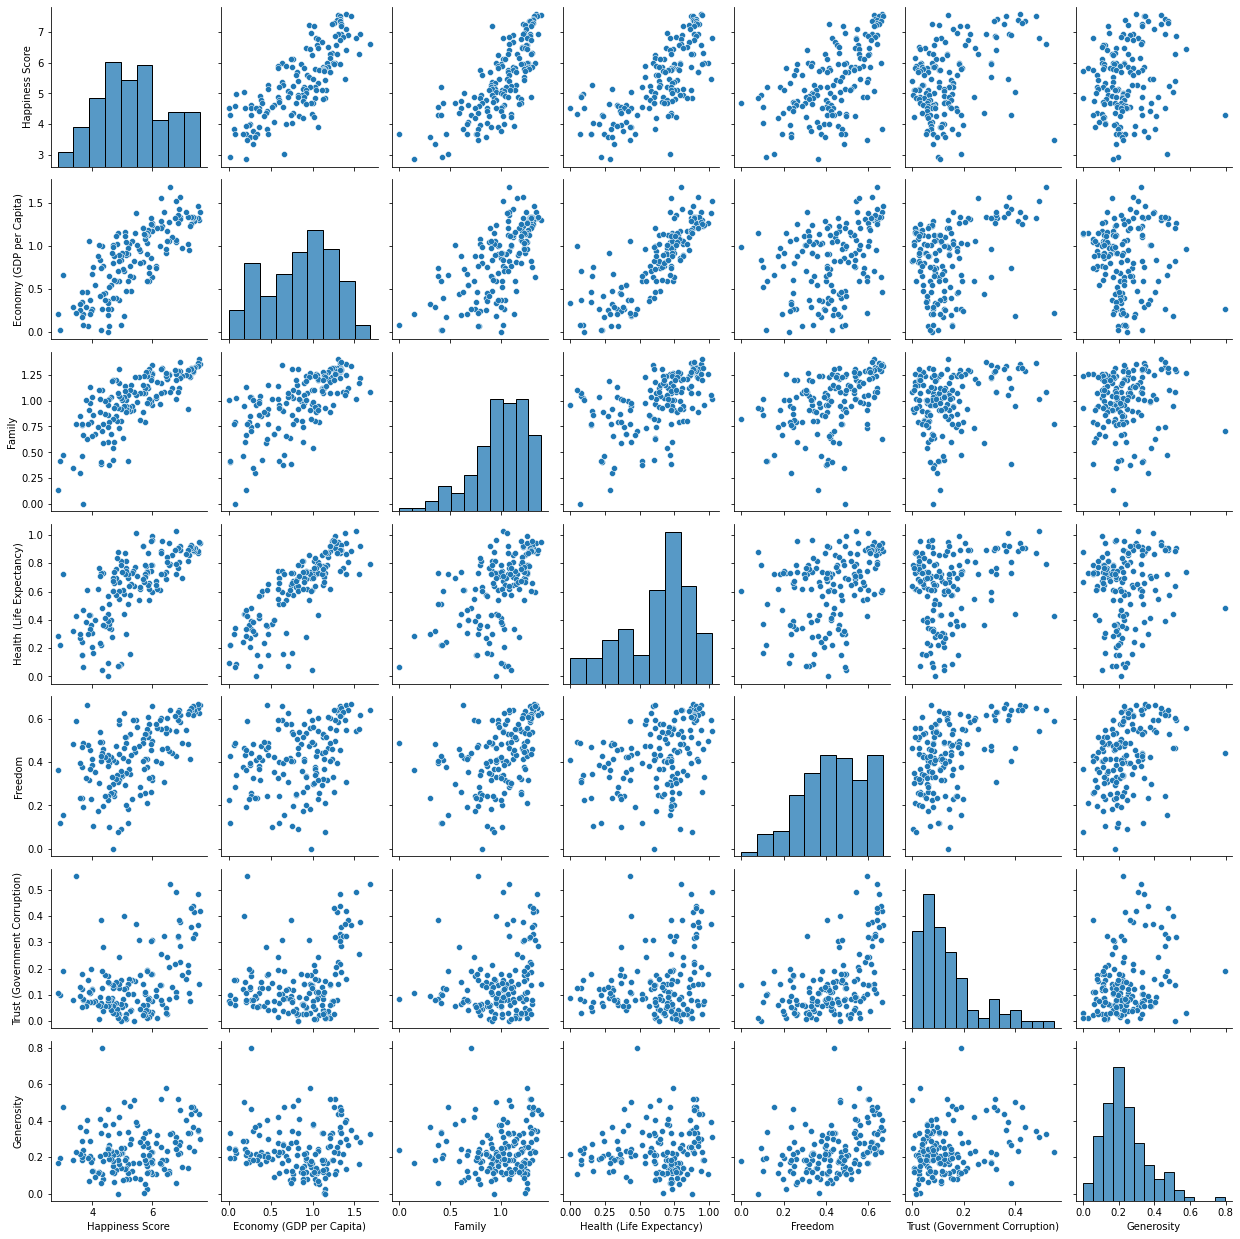

In [22]:
df_numerical = df.select_dtypes(np.float64)
df_numerical = df_numerical[~df_numerical.index.duplicated()]
sns.pairplot(df_numerical)

Text(0, 0.5, 'Happiness Score')

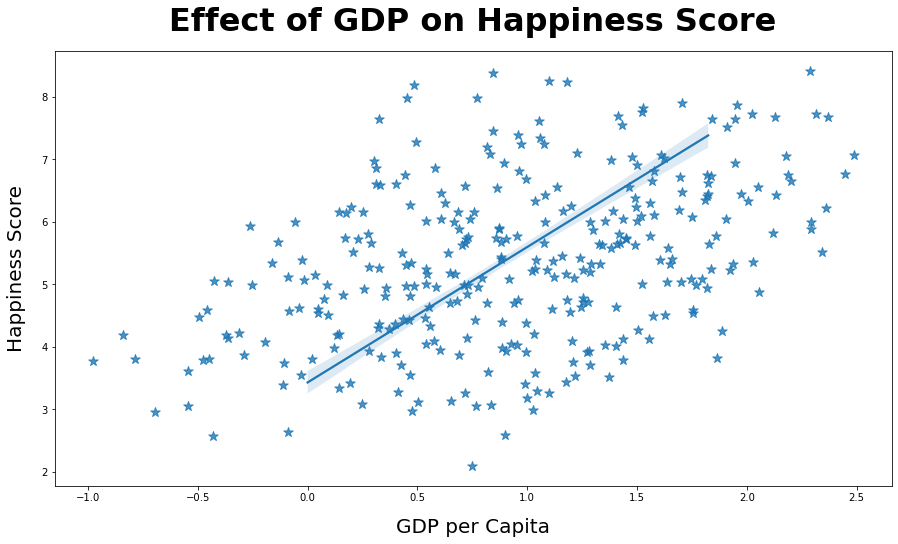

In [23]:
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df, marker='*', x_jitter=True, y_jitter=True, scatter_kws={'s': 100})
plt.title('Effect of GDP on Happiness Score', fontsize=32, pad=20, fontweight='bold')
plt.xlabel('GDP per Capita', fontsize=20, labelpad=15)
plt.ylabel('Happiness Score', fontsize=20, labelpad=15)

Text(30.425000000000004, 0.5, 'Happiness Score')

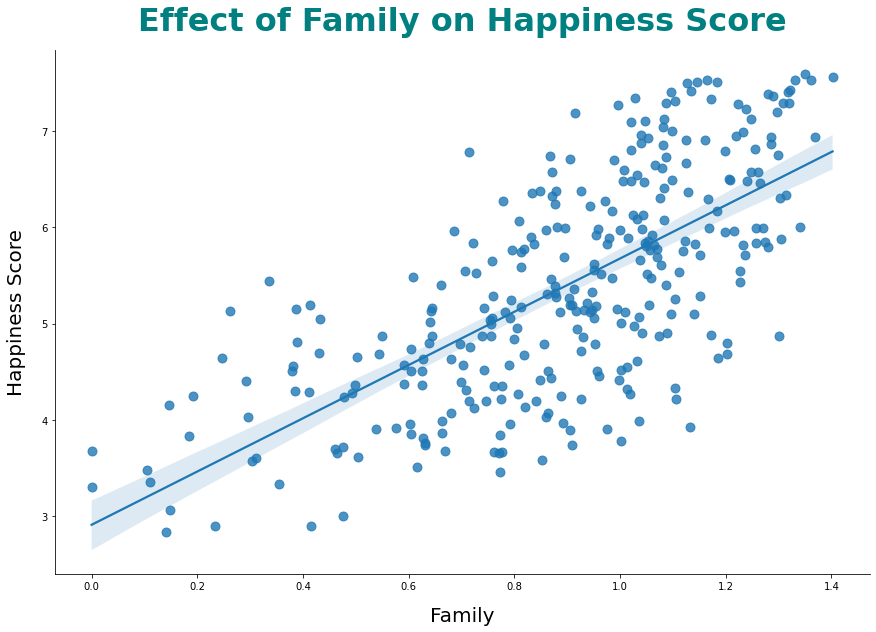

In [24]:
sns.lmplot(x='Family', y='Happiness Score', data=df, scatter_kws={'s':80}, height=8, aspect=1.5)
plt.title('Effect of Family on Happiness Score', fontsize=32, color='teal', fontweight='bold', pad=20)
plt.xlabel('Family', fontsize=20, labelpad=15)
plt.ylabel('Happiness Score', fontsize=20, labelpad=15)

Text(30.425000000000004, 0.5, 'Happiness Score')

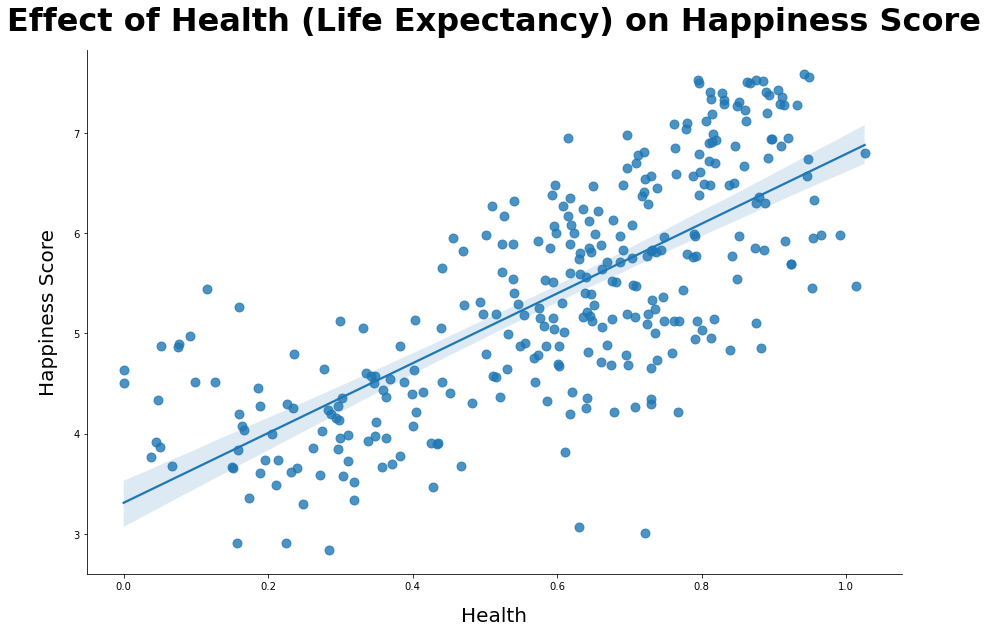

In [25]:
sns.lmplot(x='Health (Life Expectancy)', y='Happiness Score', data=df, scatter_kws={'s':80}, height=8, aspect=1.5)
plt.title('Effect of Health (Life Expectancy) on Happiness Score', fontsize=32, fontweight='bold', pad=20)
plt.xlabel('Health', fontsize=20, labelpad=15)
plt.ylabel('Happiness Score', fontsize=20, labelpad=15)

Text(0, 0.5, 'Happiness Score')

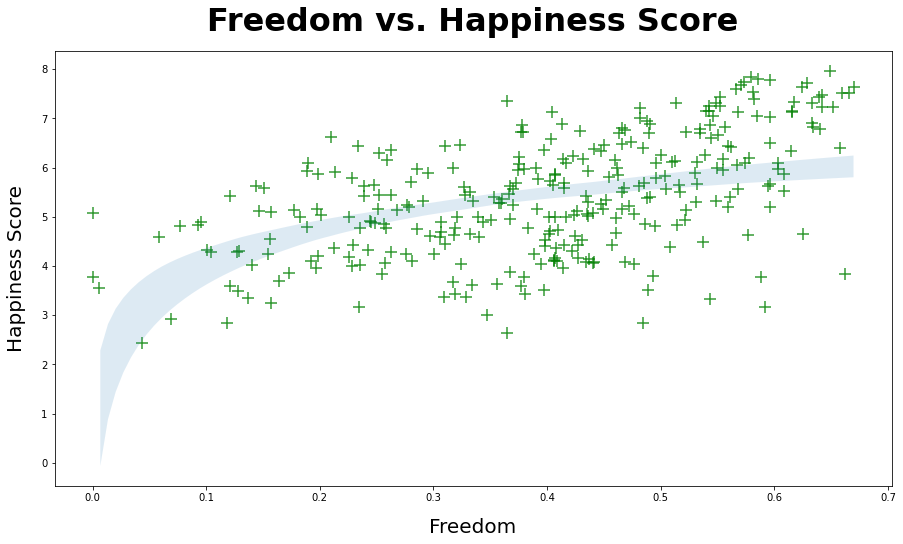

In [26]:
sns.regplot(x='Freedom', y='Happiness Score', data=df, marker='+', scatter_kws={'s':150,'color': 'green'}, logx=True, y_jitter=0.5)
plt.title('Freedom vs. Happiness Score', fontsize=32, pad=20, fontweight='bold')
plt.xlabel('Freedom', fontsize=20, labelpad=15)
plt.ylabel('Happiness Score', fontsize=20, labelpad=15)

## **Let's perform multivariate regression analysis to study effect of various parameters on overall happiness score.**



In [27]:
df['Family'].fillna(df['Family'].mean(),inplace=True)
df['Freedom'].fillna(df['Freedom'].mean(),inplace=True)
df['Economy (GDP per Capita)'].fillna(df['Economy (GDP per Capita)'].mean(),inplace=True)
df['Health (Life Expectancy)'].fillna(df['Health (Life Expectancy)'].mean(),inplace=True)
df['Happiness Score'].fillna(df['Happiness Score'].mean(),inplace=True)

In [28]:
X = df[['Family','Freedom','Economy (GDP per Capita)','Health (Life Expectancy)']]
Y = df['Happiness Score']

In [29]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     652.7
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          3.16e-286
Time:                        11:21:16   Log-Likelihood:                -343.66
No. Observations:                1084   AIC:                             697.3
Df Residuals:                    1079   BIC:                             722.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.6350      0.060     43.983      0.000       2.517       2.753
Family                       0.3605      0.057      6.300      0.000       0.248       0.473
Freedom                      1.2401      0.114     10.847      0.000       1.016       1.464
Economy (GDP per Capita)     1.3448      0.075     17.842      0.000       1.197       1.493
Health (Life Expectancy)     1.1401      0.129      8.809      0.000       0.886       1.394
==============================================================================
Omnibus:                      135.692   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.344
Skew:                           0.083   Prob(JB):                    7.19e-288
Kurtosis:                       8.408   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ***Regression results prove that the four variables, namely 'Family', 'Freedom', 'Economy (GDP per Capita)' and 'Health (Life Expectancy)' have a high explanatory power for happiness score.***
## ***It also means that there is a strong positive correlation between each of these four variables and happiness score.*** 

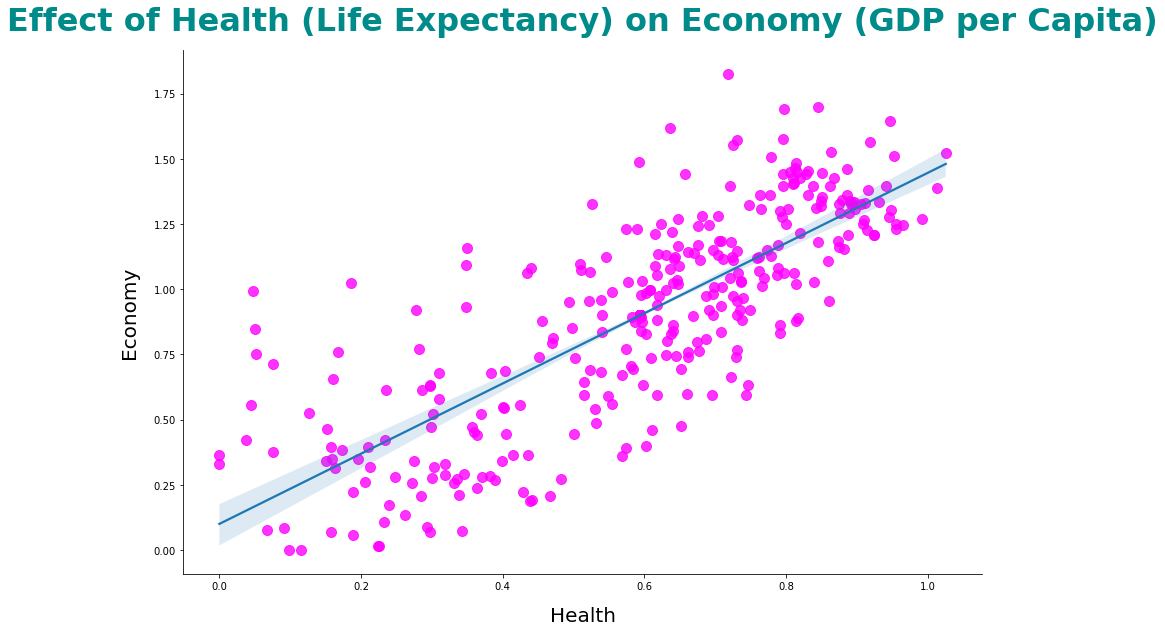

In [30]:
sns.lmplot(x='Health (Life Expectancy)', y='Economy (GDP per Capita)', data=df, scatter_kws={'s':100,'color': 'magenta'}, height=8, aspect=1.5)
plt.title('Effect of Health (Life Expectancy) on Economy (GDP per Capita)', fontsize=32, pad=20, color='darkcyan', fontweight='bold')
plt.xlabel('Health', fontsize=20, labelpad=15)
plt.ylabel('Economy', fontsize=20, labelpad=15)
plt.show()

### **There is a really strong positive correlation between health (life expectancy) and economy (GDP per capita).**

### **Let's analyze worldwide happiness score distribution using Choropleth map.**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Score                1084 non-null   float64
 3   Economy (GDP per Capita)       1084 non-null   float64
 4   Family                         1084 non-null   float64
 5   Health (Life Expectancy)       1084 non-null   float64
 6   Freedom                        1084 non-null   float64
 7   Trust (Government Corruption)  315 non-null    float64
 8   Generosity                     1084 non-null   float64
dtypes: float64(7), object(2)
memory usage: 117.0+ KB


In [32]:
data = dict(type='choropleth',
            locations=df['Country'],
            locationmode='country names',
            z=df['Happiness Score'],
            colorbar=dict(title='Happiness Score'),
            colorscale='portland',
            text=df['Country']
          )
layout = dict(title='World Happiness Report',
              geo=dict(showframe=False,
                       projection=dict(type='natural earth')
                       )
              )

In [33]:
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap, validate=False)

<Figure size 1080x576 with 0 Axes>

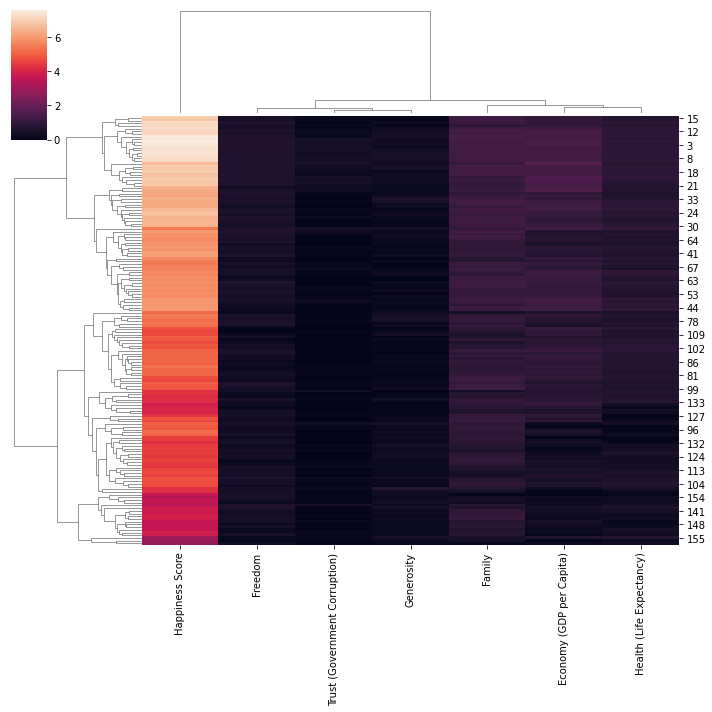

In [34]:
plt.figure(figsize=(15,8))
sns.clustermap(df_numerical)

Text(63.0, 0.5, 'Happiness Score')

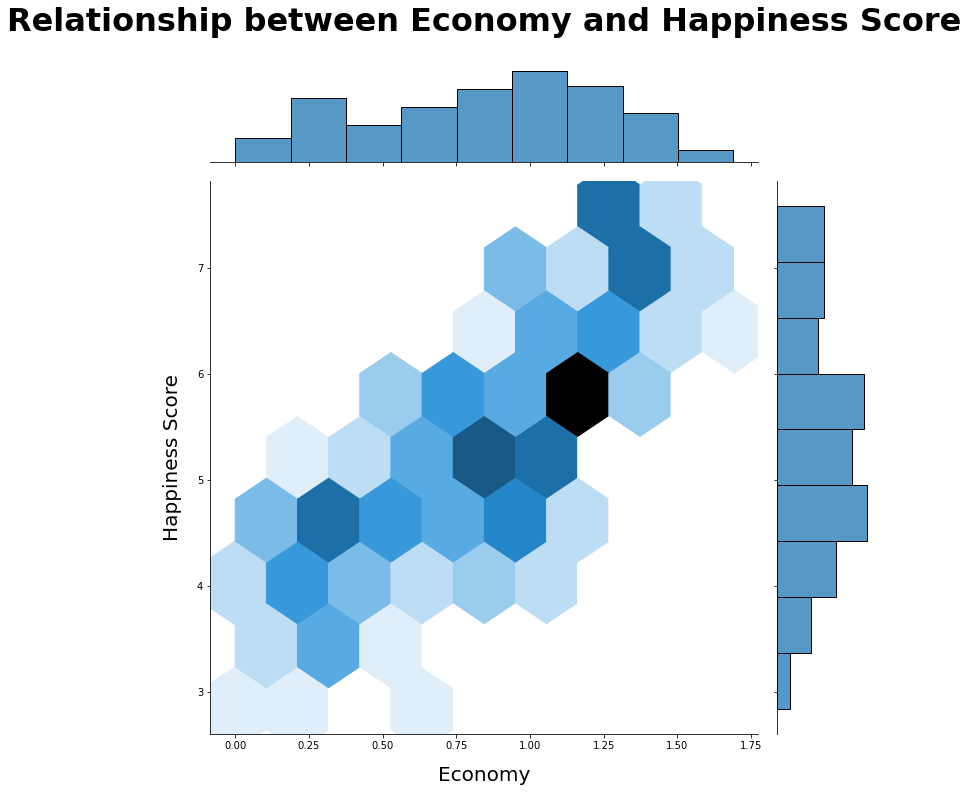

In [35]:
sns.jointplot(data=df_numerical, x='Economy (GDP per Capita)', y='Happiness Score', height=10, kind='hex')
plt.title('Relationship between Economy and Happiness Score', fontsize=32, fontweight='bold', pad=150)
plt.xlabel('Economy', fontsize=20, labelpad=15)
plt.ylabel('Happiness Score', fontsize=20, labelpad=15)

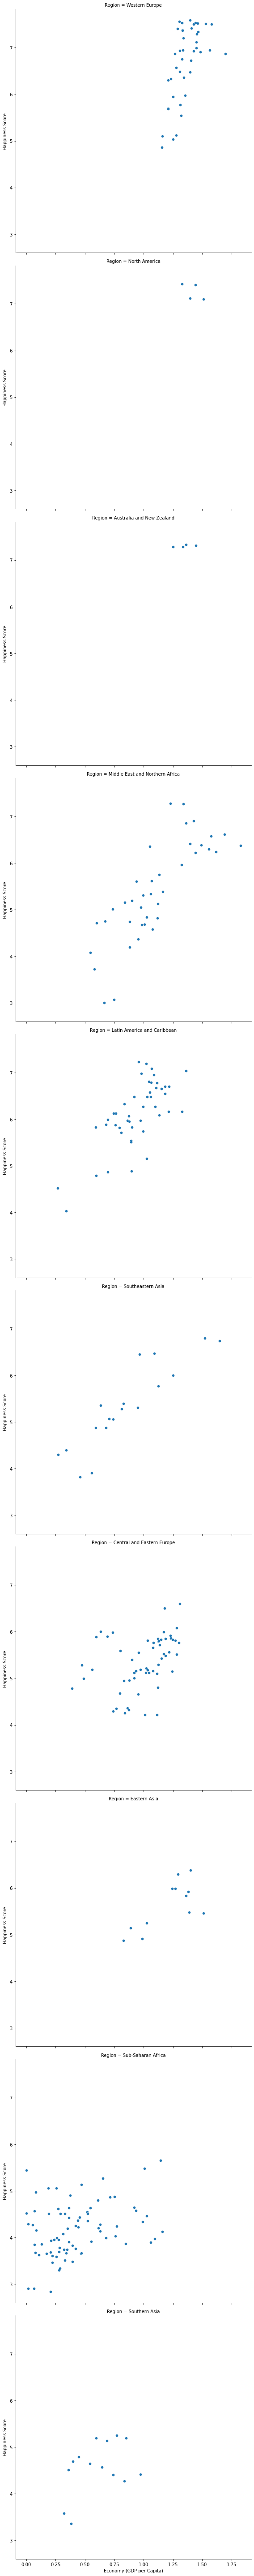

In [36]:
g = sns.FacetGrid(df,row='Region',height=8)
g.map(sns.scatterplot,'Economy (GDP per Capita)','Happiness Score')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

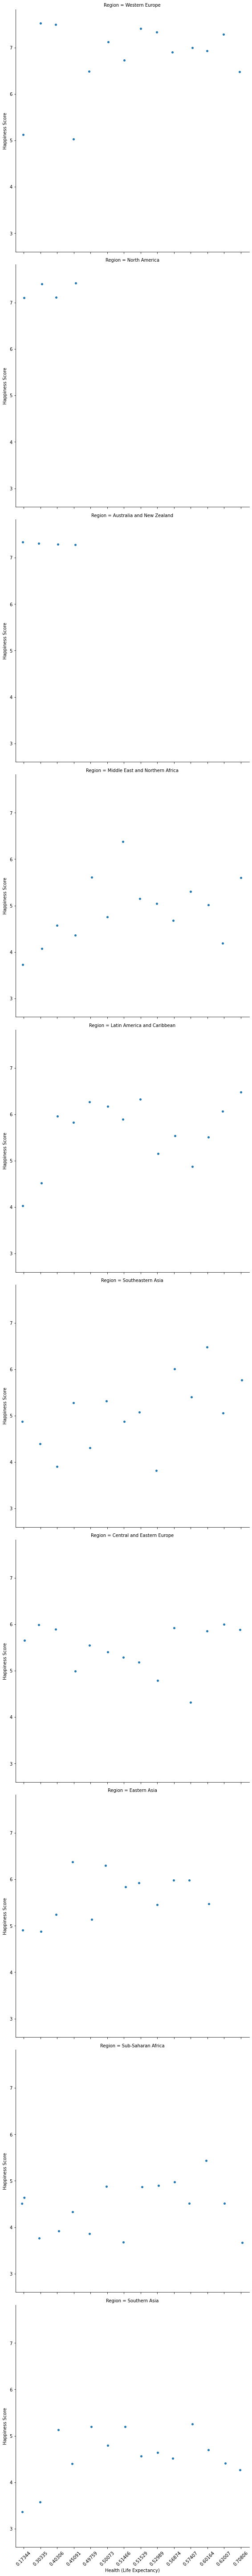

In [37]:
g = sns.FacetGrid(df,row='Region',height=8)
g.map(sns.stripplot,'Health (Life Expectancy)','Happiness Score')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

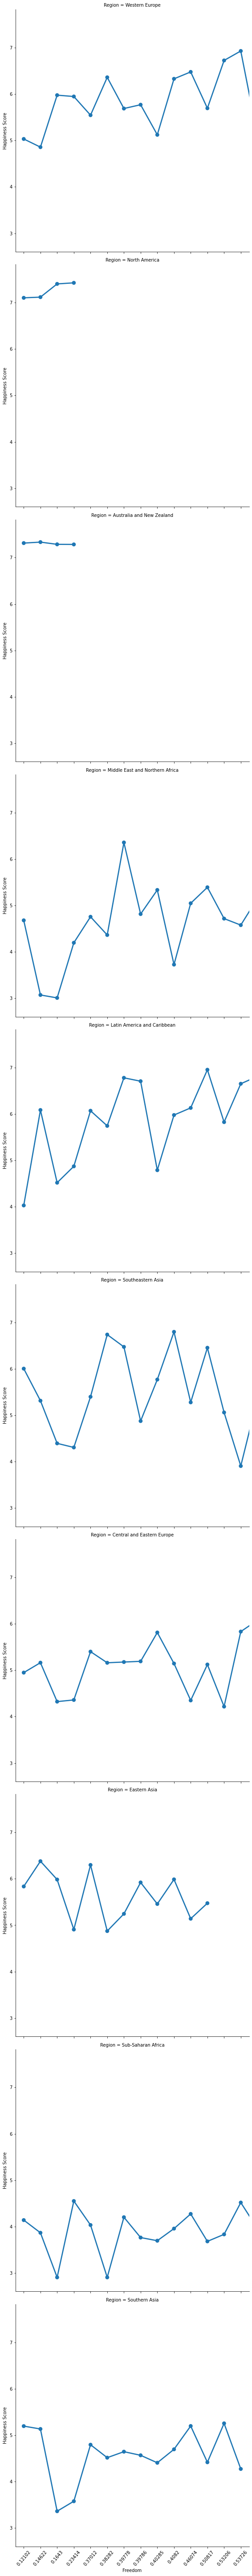

In [38]:
g = sns.FacetGrid(df, row='Region', height=8)
g.map(sns.pointplot, 'Freedom', 'Happiness Score')
plt.xticks(rotation=50)

Handling Missing values and Categorical Values


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Score                1084 non-null   float64
 3   Economy (GDP per Capita)       1084 non-null   float64
 4   Family                         1084 non-null   float64
 5   Health (Life Expectancy)       1084 non-null   float64
 6   Freedom                        1084 non-null   float64
 7   Trust (Government Corruption)  315 non-null    float64
 8   Generosity                     1084 non-null   float64
dtypes: float64(7), object(2)
memory usage: 117.0+ KB


In [40]:
df.isnull().sum()

Country                          614
Region                           769
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)    769
Generosity                         0
dtype: int64

In [41]:
o = (df.dtypes == 'object') 

object_cols = o[o].index 
print(f'Categorical Variables : {object_cols}')

Categorical Variables : Index(['Country', 'Region'], dtype='object')


In [42]:
trust_mean = df['Trust (Government Corruption)'].mean()
df['Trust (Government Corruption)'] = df['Trust (Government Corruption)'].fillna(trust_mean)

In [43]:
df[object_cols].isnull().sum()

Country    614
Region     769
dtype: int64

In [44]:
df.isnull().sum()

Country                          614
Region                           769
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
dtype: int64

In [45]:
df[object_cols] = df[~df[object_cols].isnull()][object_cols]

In [46]:
oe = OrdinalEncoder()
df[object_cols] = oe.fit_transform(df[object_cols])

In [47]:
sc = StandardScaler()
df_columns = df.columns 
df[df_columns] = sc.fit_transform(df[df_columns])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    float64
 1   Region                         315 non-null    float64
 2   Happiness Score                1084 non-null   float64
 3   Economy (GDP per Capita)       1084 non-null   float64
 4   Family                         1084 non-null   float64
 5   Health (Life Expectancy)       1084 non-null   float64
 6   Freedom                        1084 non-null   float64
 7   Trust (Government Corruption)  1084 non-null   float64
 8   Generosity                     1084 non-null   float64
dtypes: float64(9)
memory usage: 117.0 KB


In [49]:
country_mean = df['Country'].mean()
region_mean = df['Region'].mean()
df['Country'] = df['Country'].fillna(country_mean)
df['Region'] = df['Region'].fillna(region_mean)

print(f'Null Value sum : {df.isnull().sum()}')


Null Value sum : Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


In [50]:
features = df[['Family','Freedom','Economy (GDP per Capita)','Health (Life Expectancy)']]
label = df['Happiness Score']

In [51]:
x_train,x_test ,y_train,y_test= train_test_split(features , label , test_size = 0.2 , random_state = 42)
print(f'x train shape : {x_train.shape}')
print(f'y train shape : {y_train.shape}')
print(f'x test shape : {x_test.shape}')
print(f'y test shape : {y_test.shape}')

x train shape : (867, 4)
y train shape : (867,)
x test shape : (217, 4)
y test shape : (217,)


In [52]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

predict_train = lr_model.predict(x_train)
predict_test = lr_model.predict(x_test)

#Root Mean Squared Error on train and test sets, 
lr_rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
lr_rmse_test = mean_squared_error(y_test,predict_test)**(0.5)

print(f'RMSE on train data : {lr_rmse_train}')
print(f'RMSE on test data : {lr_rmse_test}')


RMSE on train data : 0.5470735871262213
RMSE on test data : 0.5162261893211597


Feature: 0, Score: 0.13748
Feature: 1, Score: 0.19124
Feature: 2, Score: 0.47811
Feature: 3, Score: 0.23288


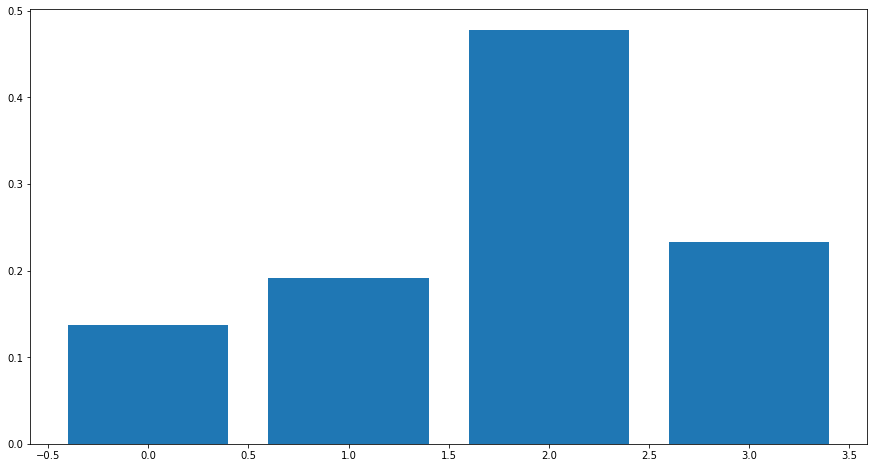

In [53]:
#Feature Importance of Linear Regression
lr_importance = lr_model.coef_
# summarize feature importance with li
# near regression
for i,v in enumerate(lr_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance with linear regression
plt.bar([x for x in range(len(lr_importance))], lr_importance)
plt.show()

In [54]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(x_train,y_train)

predict_train = rf_model.predict(x_train)
predict_test = rf_model.predict(x_test)

#Root Mean Squared Error on train and test sets, 

rf_rmse_train = mean_squared_error(y_train, predict_train)**(0.5)
rf_rmse_test = mean_squared_error(y_test, predict_test)**(0.5)

print(f'RMSE on train data : {rf_rmse_train}')
print(f'RMSE on test data : {rf_rmse_test}')


RMSE on train data : 0.193747558859495
RMSE on test data : 0.5081219411883684


In [55]:
xgb_model = XGBRFRegressor()
xgb_model.fit(x_train, y_train)

predict_train = xgb_model.predict(x_train)
predict_test = xgb_model.predict(x_test)

#Root Mean Squared Error on train and test sets,
xgb_rmse_train = mean_squared_error(y_train, predict_train)**(0.5)
xgb_rmse_test = mean_squared_error(y_test, predict_test)**(0.5)

print(f'RMSE on train data : {xgb_rmse_train}')
print(f'RMSE on test data : {xgb_rmse_test}')


RMSE on train data : 0.2995269495789391
RMSE on test data : 0.5191134046518696


In [56]:
perf_data = np.array([['Linear Regression',lr_rmse_train, lr_rmse_test],
                    ['Random Forest', rf_rmse_train, rf_rmse_test],
                    ['XGBoost',xgb_rmse_train, xgb_rmse_test]])

In [57]:
model_df = pd.DataFrame(data= perf_data,columns=['model name','RMSE on train data','RMSE on test data'])

In [58]:
model_df

,model name,RMSE on train data,RMSE on test data
0,Linear Regression,0.5470735871262213,0.5162261893211597
1,Random Forest,0.193747558859495,0.5081219411883684
2,XGBoost,0.2995269495789391,0.5191134046518696


Linear Regression Model predicted better than Random Forest, XGBoost